# Task # 2 - To Explore Supervised Machine Learning

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. 

Data can be found at http://bit.ly/w-data

What will be predicted score if a student study for 9.25 hrs in a day? 


In [1]:
#importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Reading the data

In [2]:
data = pd.read_csv('students_study_hrs.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
print(data.shape)
print(data.columns)

(25, 2)
Index(['Hours', 'Scores'], dtype='object')


In [4]:
#checking for any null values
data.isnull().any()

Hours     False
Scores    False
dtype: bool

### Visualising the data

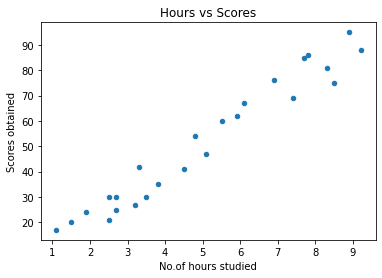

In [5]:
data.plot(x ='Hours',y='Scores', kind='scatter')
plt.xlabel('No.of hours studied')
plt.ylabel('Scores obtained')
plt.title('Hours vs Scores')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and scores obtained.**

### Preparing the data for model

In [6]:
y = data['Scores'].values
X = data.drop('Scores', axis = 1)

In [7]:
#Splitting dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(20, 1) (20,)
(5, 1) (5,)


In [8]:
# Training the datasets
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)
y_pred = lm.predict(X_test)

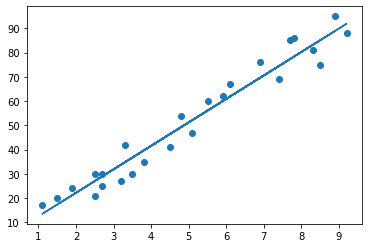

In [9]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [10]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### Checking the accuracy 

In [11]:
lm.score(X_test, Y_test)

0.9678055545167994

In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_pred)
print("Mean squared error=",mse)

Mean squared error= 18.943211722315272


In [13]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, y_pred)
print("Mean absolute error=",mae)

Mean absolute error= 3.9207511902099244


### What will be predicted score if a student study for 9.25 hrs in a day?

In [14]:
# What will be predicted score if a student study for 9.25 hrs in a day?
hours = 9.25
pred_score = lm.predict([[hours]])
print("No.of hours =",hours)
print("Predicted score =",pred_score[0])

No.of hours = 9.25
Predicted score = 92.38611528261494
